In [3]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from SOM_plus_clustering.som import SOM
import pickle
import sys

In [4]:
df = pd.read_csv("Datas/pca_data.csv")
df.drop_duplicates(inplace=True)
df

,0,1,2
0,3.714942,-0.689732,0.488571
1,-3.609684,0.785128,-1.290057
2,-4.379188,-0.831499,0.028767
3,-0.521467,0.098953,-1.193626
4,1.505823,-1.248018,-1.449953
...,...,...,...
62003,-1.396271,-2.105892,-0.537394
62018,-11.091289,-0.597558,2.830648
62025,8.722874,-1.937150,-0.300933
62040,12.548019,0.399632,-1.360353


In [5]:
pkl_filename = "models/pca_model.pkl"
with open(pkl_filename, 'rb') as file:
    pca_model = pickle.load(file)

In [6]:
X = df.values
model = SOM(m = 1,
            n = 5, 
            dim=X.shape[1],
            max_iter=sys.maxsize,
            initiate_method="SOM++",
            learning_rate=0.5,
            neighbour_rad=2)
model.fit(X, epoch=50)
model.neurons

Training   | [███████████████████████████████████████ ] 98% 

array([[[ -2.53022798,   0.69268364,  -0.09029893],
        [  5.25707681,   0.32555656,  -1.8164218 ],
        [-10.09014919,   2.10675689,   1.94443479],
        [  1.26412264,   4.62975967,   2.06557519],
        [ -8.03810976,  -3.46795674,   1.98557719]]])

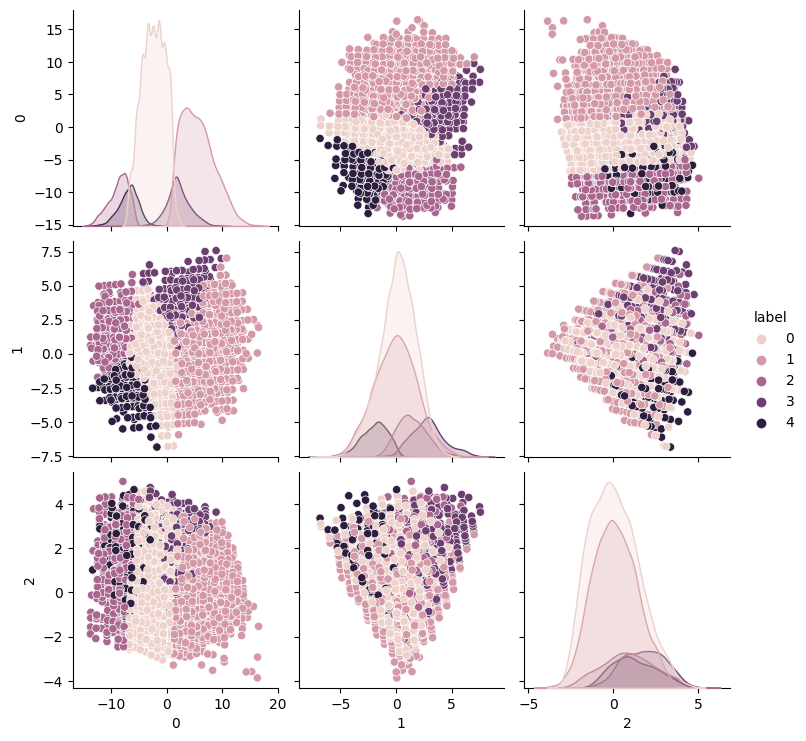

In [7]:
pred = model.predict(X)
plot_df = df.copy(deep=True)
plot_df["label"] = pred
sns.pairplot(plot_df, hue="label", corner=False)

In [8]:
cluster_centers = model.neurons
cluster_centers = np.reshape(cluster_centers, (-1,X.shape[1]))
cluster_centers.shape

(5, 3)

In [9]:
data_cols = pd.read_csv("Datas/clear_encoded_data.csv")
cluster_data = pd.DataFrame(pca_model.inverse_transform( model.cluster_center_), columns=data_cols.columns)
cluster_data[cluster_data > .1].dropna(axis=1)

,C,F,N,O,S
0,13.906405,0.260585,1.926025,1.984192,0.376103
1,21.824712,0.329863,1.946784,0.978922,0.174623
2,6.213610,0.174282,1.300303,3.897909,0.602636
3,17.550853,0.104003,0.561626,6.385341,0.444192
4,8.047641,0.120085,5.888147,0.603699,0.456855


In [11]:
cluster_data[cluster_data > .1].dropna(axis=1).round(4).to_excel("Datas/Stats/clustercenters.xlsx", index=False)
cluster_data[cluster_data > .1].dropna(axis=1).round(4).to_csv("Datas/Stats/clustercenters.csv", index=False)